In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math

In [139]:
def eulerSIR(initial):
    
    I0, S0 = initial
    dt = 0.1
    Dp = np.diag([1,2,3,4])
    C = np.array([[0.1125, 0.1125, 0.1125, 0.1125],
                       [0.1125, 0.1125, 0.1125, 0.1125],
                       [0.1125, 0.1125, 0.1125, 0.1125],
                       [0.1125, 0.1125, 0.1125, 0.1125]])
    Dw = np.diag([4,4,4,4])
    Dg = np.diag([1/3,1/3,1/3,1/3])
    
    # lists to store SIR values & initial conditions
    sList = []
    sList.append([S0,S0,S0,S0])
    iList = []
    iList.append([I0,I0,I0,I0])
    rList = []
    rList.append([0,0,0,0])

    # list to store time
    time = np.arange(0, 50, dt).tolist()
    
    for i in range(0,len(time)-1):
        Ds = np.diag(sList[-1]) 
        i = np.diag(iList[-1])
        r = np.diag(rList[-1])
    
        sdot = -Ds*Dp*C*Dw*i
        Ds1 = Ds + sdot
        s = np.diag(Ds1)
        
        idot = Ds*Dp*C*Dw*i - Dg*i
        i1 = i + idot 
        i2 = np.diag(i1)
        
        rdot = Dg*i
        r1 = r + rdot
        r2 = np.diag(r1) 
    
        sList.append(s)
        iList.append(i2)
        rList.append(r2)
    return((time, sList,iList,rList))

In [167]:
def plot(time, sList):
    i1 = list(map(lambda x: x[0], iList))
    i2 = list(map(lambda x: x[1], iList))
    i3 = list(map(lambda x: x[2], iList))
    i4 = list(map(lambda x: x[3], iList))
    fig, ax = plt.subplots(nrows=1,ncols=1)
    ax.plot(time,i1,label='I1',color="#e4c9d6")
    ax.plot(time,i2,label='I2',color="#b77093")
    ax.plot(time,i3,label='I3',color="#743554")
    ax.plot(time,i4,label='I4',color="#210f18")
    ax.legend(loc='center right')
    ax.set_xlim(left=0)
    ax.set_xlim(right=9)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('time')
    ax.set_ylabel('population')
    ax.set_title('Infections by Group')

In [168]:
initial = (0.001,0.999) # initial conditions (I,S)

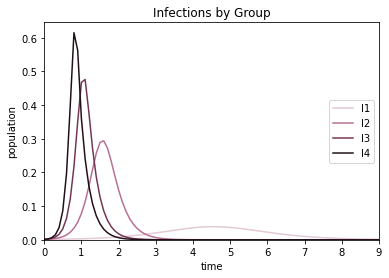

In [169]:
time, sList, iList, rList = eulerSIR(initial)
plot(time,sList)